# Under Evaluation ...

# Intrusion Detection System
#### Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders.

for more information please refer to: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

train_df = pd.read_csv("kddcup.data", header=None, names=col_names, sep=",")
test_df = pd.read_csv("KDD_test", header=None, names=col_names)

print(f"Traning dataset dimentions: {train_df.shape}")
print(f"Testing dataset dimentions: {test_df.shape}")

Traning dataset dimentions: (4898431, 42)
Testing dataset dimentions: (311029, 42)


In [4]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


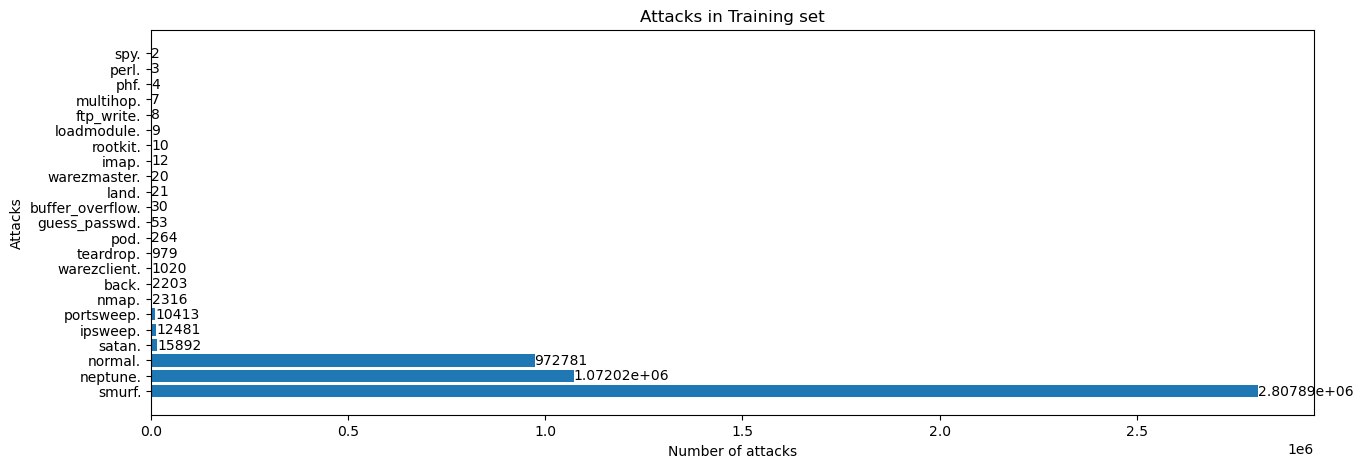

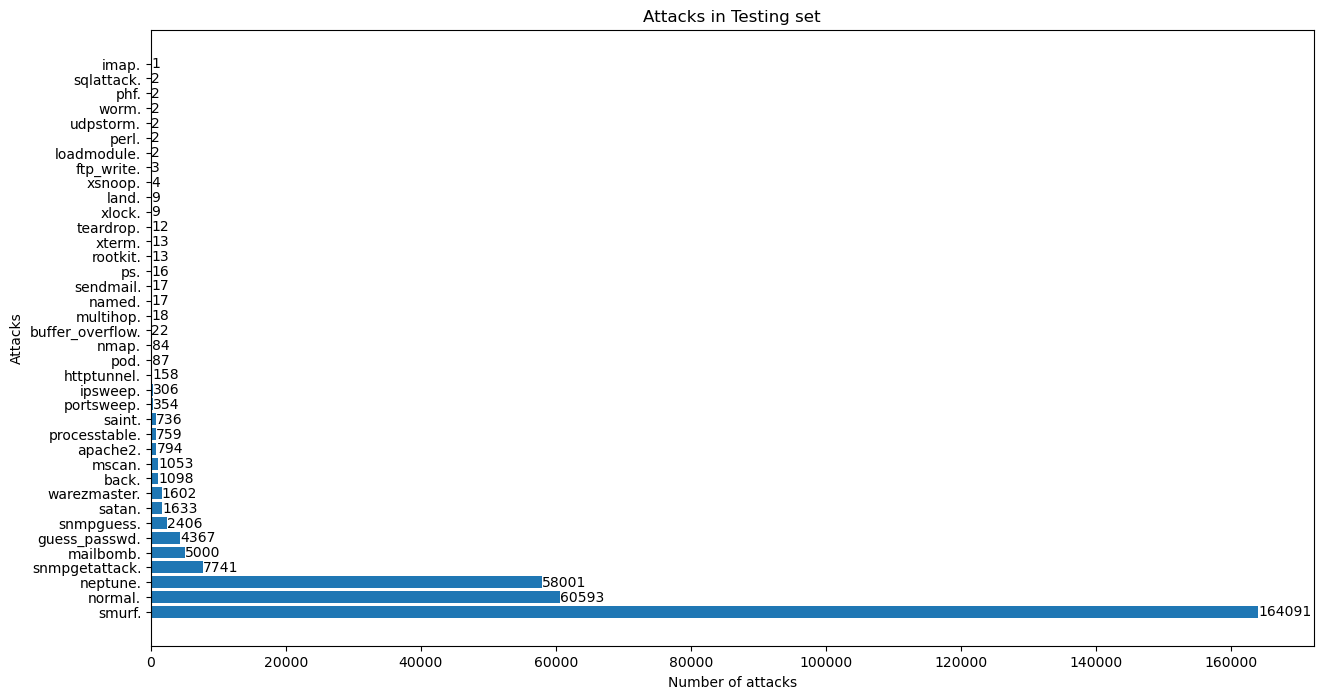

In [5]:
def plot_attacks(dataset, size=(10,10), title=None):
    """
    Plot Horizental Bar chart for the 'target' columns
    
    Keyword arguments:
    dataset - Dataset to plot from 
    size - size of the figure (Defualt=(10,10))
    title - title for the figure (Defualt=None)
    """
    df = pd.DataFrame({'column_name':dataset["target"]})
    value_counts = df['column_name'].value_counts()
    dataset = pd.DataFrame({'Category': value_counts.index, 'Count': value_counts.values})

    fig, ax = plt.subplots(figsize=size)
    bars = ax.barh(dataset["Category"], dataset["Count"])
    ax.set_title(title)
    ax.set_xlabel("Number of attacks")
    ax.set_ylabel("Attacks")
    ax.bar_label(bars);
    
plot_attacks(train_df, (15, 5), "Attacks in Training set")
plot_attacks(test_df, (15, 8), "Attacks in Testing set")

# Data Preprocessing

/var/folders/wn/j5zwybhn5dz60s458cvb37bh0000gn/T/ipykernel_7915/3375158621.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


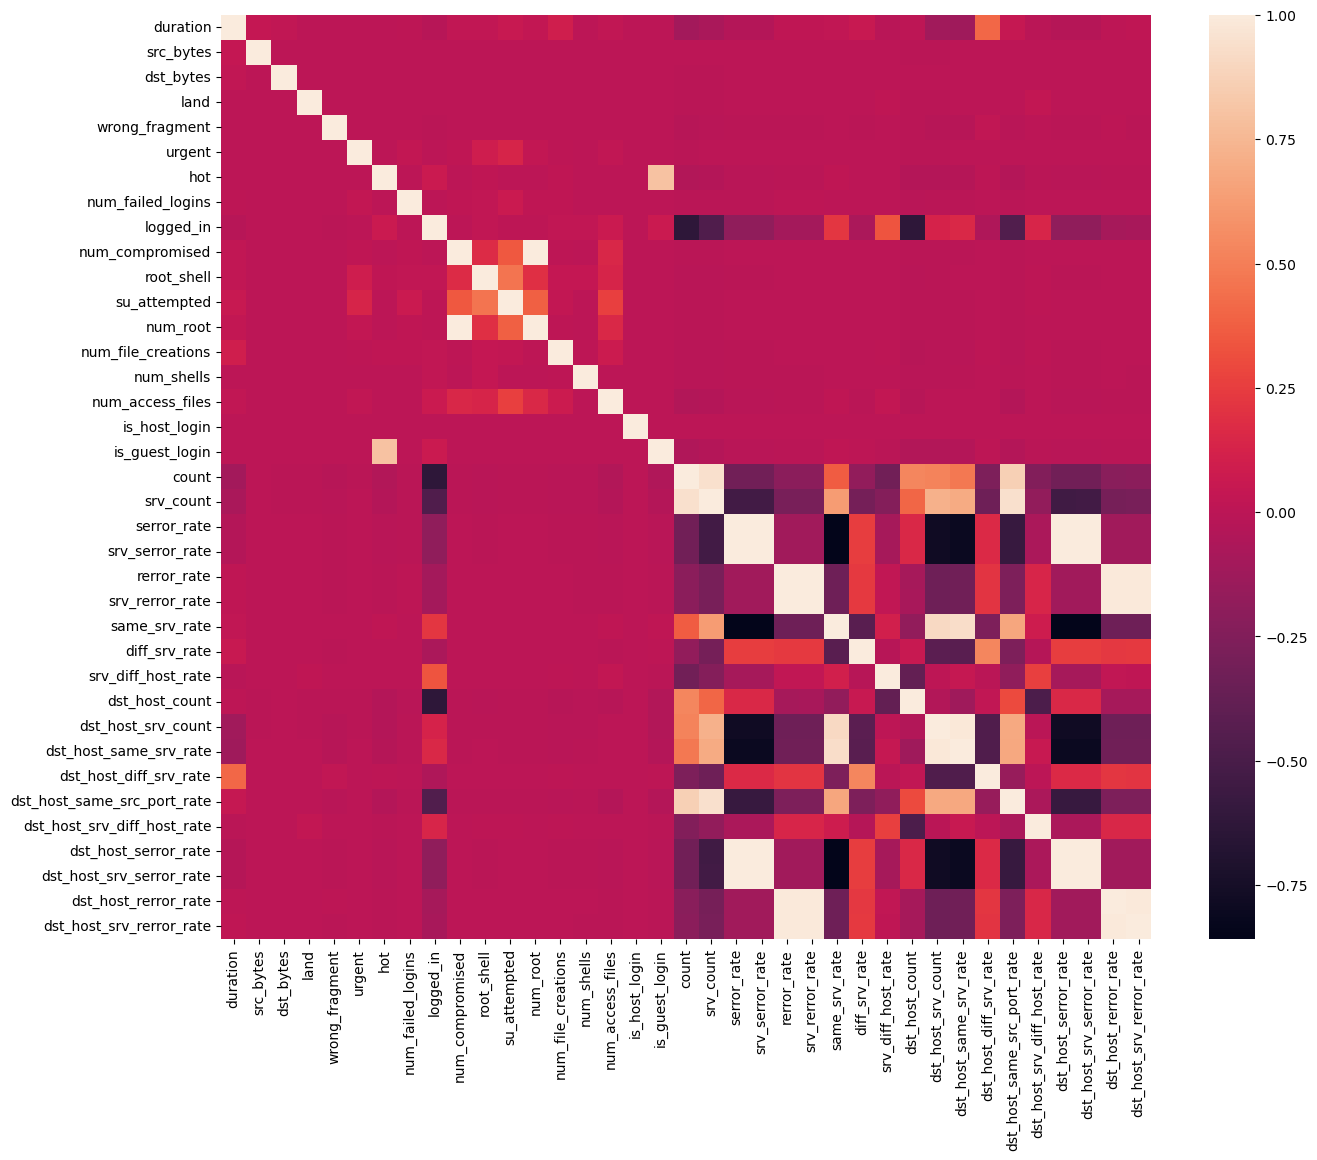

In [6]:
# Select columns with more than 1 unique value in the train_df DataFrame
train_df = train_df[[col for col in train_df if train_df[col].nunique() > 1]]

corr = train_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr);

### Remove the features which have a very high correlation >99%

In [7]:
high_corr_list = ["num_root", "srv_serror_rate", 'srv_rerror_rate', 'dst_host_srv_serror_rate',
                  'dst_host_serror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 
                  'dst_host_srv_rerror_rate', 'srv_count']

for col in high_corr_list:
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

### The `target` column contains attacks which belong to four groups:
* **Dos** = Back, Land, Neptune, Pod, Smurf, Teardrop,Apache2, Udpstorm, Processtable, Worm
* **Probe** = Satan, Ipsweep, Nmap, Portsweep, Mscan, Saint 
* **R2L** = Guess_Password, Ftp_write, Imap, Phf, Multihop, Warezmaster, Warezclient, Spy, Xlock, Xsnoop, Snmpguess, Snmpgetattack, Httptunnel, Sendmail, Named
* **U2R** = Buffer_overflow, Loadmodule, Rootkit, Perl, Sqlattack, Xterm, Ps

### Labeling the attacks as follows:
* **normal = 0**
* **DoS = 1**
* **Probe = 2**
* **R2L = 3**
* **U2R = 4**

In [8]:
# take label column
labeldf = train_df["target"]
labeldf_test = test_df["target"]
# change the label column
newlabeldf = labeldf.replace({
    'normal.': 0, 'neptune.': 1, 'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1, 'mailbomb.': 1,
    'apache2.': 1, 'processtable.': 1, 'udpstorm.': 1, 'worm.': 1,
    'ipsweep.': 2, 'nmap.': 2, 'portsweep.': 2, 'satan.': 2, 'mscan.': 2, 'saint.': 2,
    'ftp_write.': 3, 'guess_passwd.': 3, 'imap.': 3, 'multihop.': 3, 'phf.': 3, 'spy.': 3, 'warezclient.': 3,
    'warezmaster.': 3, 'sendmail.': 3, 'named.': 3, 'snmpgetattack.': 3, 'snmpguess.': 3, 'xlock.': 3,
    'xsnoop.': 3, 'httptunnel.': 3, 'buffer_overflow.': 4, 'loadmodule.': 4, 'perl.': 4, 'rootkit.': 4,
    'ps.': 4, 'sqlattack.': 4, 'xterm.': 4
})

newlabeldf_test = labeldf_test.replace({
    'normal.': 0, 'neptune.': 1, 'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1, 'mailbomb.': 1,
    'apache2.': 1, 'processtable.': 1, 'udpstorm.': 1, 'worm.': 1,
    'ipsweep.': 2, 'nmap.': 2, 'portsweep.': 2, 'satan.': 2, 'mscan.': 2, 'saint.': 2,
    'ftp_write.': 3, 'guess_passwd.': 3, 'imap.': 3, 'multihop.': 3, 'phf.': 3, 'spy.': 3, 'warezclient.': 3,
    'warezmaster.': 3, 'sendmail.': 3, 'named.': 3, 'snmpgetattack.': 3, 'snmpguess.': 3, 'xlock.': 3,
    'xsnoop.': 3, 'httptunnel.': 3, 'buffer_overflow.': 4, 'loadmodule.': 4, 'perl.': 4, 'rootkit.': 4,
    'ps.': 4, 'sqlattack.': 4, 'xterm.': 4
})

# put the new label column back
train_df["target"] = newlabeldf
test_df["target"] = newlabeldf_test

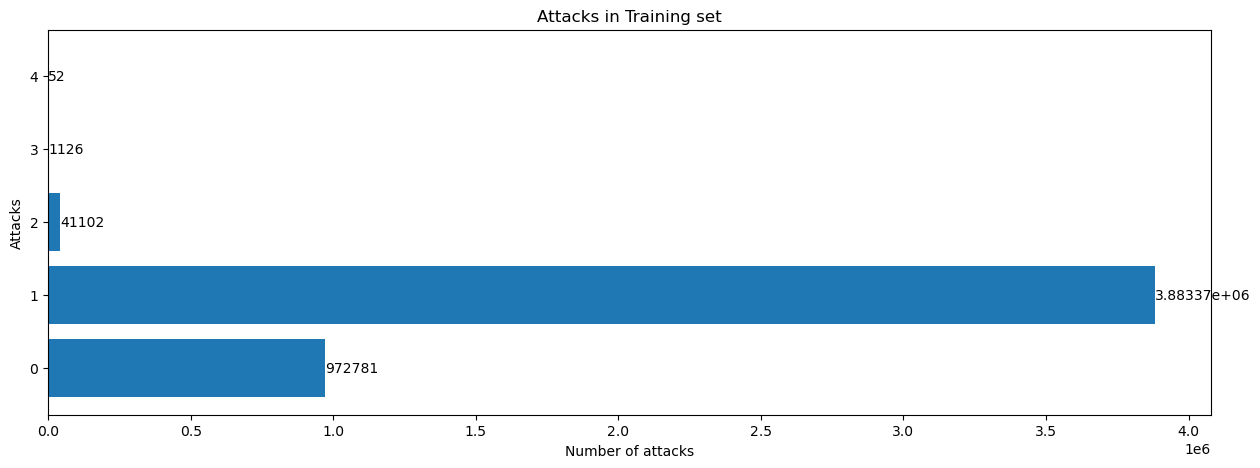

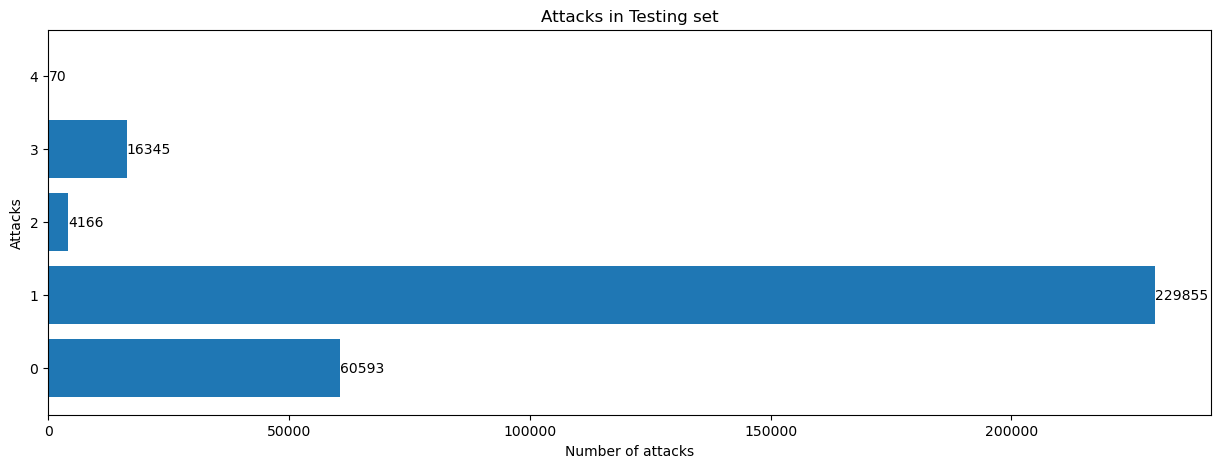

In [82]:
plot_attacks(train_df, (15, 5), "Attacks in Training set")
plot_attacks(test_df, (15, 5), "Attacks in Testing set")


#### Extract the catogerical features

In [10]:
def get_catogerical_features(dataset):
    """
    Get categoriral featrues in the dataset
    """
    for col_name in dataset.columns:
        if dataset[col_name].dtypes == "object" :
            unique_cat = len(dataset[col_name].unique())
            print(f"Feature '{col_name}' has {unique_cat} categories")
            
print("Training set:")
get_catogerical_features(train_df)

print("\nTesting set:")
get_catogerical_features(test_df)

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories

Testing set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 65 categories
Feature 'flag' has 11 categories


In [11]:
categorical_columns = ['protocol_type', 'service', 'flag']

df_categorical_values = train_df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


In [12]:
def get_categories(dataset, column, string):
    """
    Get unique categories from the specified dataset and column.

    Parameters:
        dataset (DataFrame): The dataset containing the categorical column.
        column (str): The name of the categorical column.
        string (str): A string to prefix the unique categories.

    Returns:
        list: A list of strings representing unique categories, each prefixed with the provided string.
    """
    
    unique_cat = sorted(dataset[column].unique())
    unique_category = [string + x for x in unique_cat]
    
    return unique_category

unique_protocol = get_categories(train_df, "protocol_type", "Protocol_type_")
unique_service = get_categories(train_df, "service", "service_")
unique_falg = get_categories(train_df, "flag", "flag_")

unique_categories_list = unique_protocol + unique_service + unique_falg

unique_service_test = get_categories(test_df, "service", "service_")

test_columns = unique_protocol + unique_service_test + unique_falg

### Applying `OneHotEncoder` and `LabelEncoder` 

In [13]:
from sklearn.preprocessing import LabelEncoder

df_categorical_values_enc = df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc = testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type service flag
0           tcp    http   SF
1           tcp    http   SF
2           tcp    http   SF
3           tcp    http   SF
4           tcp    http   SF
--------------------
   protocol_type  service  flag
0              1       24     9
1              1       24     9
2              1       24     9
3              1       24     9
4              1       24     9


In [14]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')

# train set
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=unique_categories_list)


# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=test_columns)

### Finding and Adding Missing Categorical Columns

The `find_difference` function is used to find categorical service values that exist in one dataframe but not in another. It then adds corresponding columns to the target dataframe with default values of 0.

In [15]:
def find_difference(has_more, has_less): 
    """
    Find the categorical service values that exist in `has_more` but not in `has_less`,
    and add corresponding columns to the target dataframe with default values of 0.

    Parameters:
        has_more (DataFrame): DataFrame with more categorical values.
        has_less (DataFrame): DataFrame with fewer categorical values.

    Returns:
        None
    """
    more_service = has_more['service'].tolist()
    less_service = has_less['service'].tolist()
    difference = list(set(more_service) - set(less_service))
    
    string = 'service_'
    difference = [string + x for x in difference]
    
    if has_more.equals(train_df):
        for col in difference:
            testdf_cat_data[col] = 0
    elif has_more.equals(test_df):
        for col in difference:
            df_cat_data[col] = 0

find_difference(train_df, test_df)
find_difference(test_df, train_df)

print(df_cat_data.shape)    
print(testdf_cat_data.shape)

(4898431, 85)
(311029, 85)


### Updating Dataframes with Additional Categorical Columns

The dataframes `new_train_df` and `new_test_df` are updated by joining them with the additional categorical columns obtained from `df_cat_data` and `testdf_cat_data`. After joining, the original categorical columns are dropped to prevent duplication.

In [16]:
new_train_df = train_df.join(df_cat_data)
new_train_df.drop(categorical_columns, inplace=True, axis=1)

new_test_df = test_df.join(testdf_cat_data)
new_test_df.drop(categorical_columns, inplace=True, axis=1)


### Rearranging the columns in `new_test_df` to match `new_train_df`

To ensure consistency in the order of columns between `new_train_df` and `new_test_df`, the columns in `new_test_df` are arranged to match the order of columns in `new_train_df`.

In [17]:
arrange_columns = list(new_train_df.columns)
new_test_df = new_test_df[arrange_columns]

In [18]:
new_test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_icmp
0,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
new_train_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_icmp
0,0,215,45076,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0,162,4528,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0,236,1228,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0,233,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


### Preparing Feature and Target Sets for Training and Testing

In [20]:
X_train = new_train_df.drop("target", axis=1)
y_train = new_train_df["target"]

X_test = new_test_df.drop("target", axis=1)
y_test = new_test_df["target"]

### Scaling `X_train` and `X_test` using `StandardScaler`

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_preds(y_true, y_preds):
    """
    Evaluate the performance of classification predictions using various metrics.

    Parameters:
        y_true (array-like): True labels or ground truth.
        y_preds (array-like): Predicted labels from a classifier.

    Returns:
        dict: A dictionary containing the calculated evaluation metrics.
            - "accuracy" (float): Accuracy score.
            - "precision" (float): Weighted precision score.
            - "recall" (float): Weighted recall score.
            - "f1" (float): Weighted F1 score.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, zero_division=1, average="weighted")
    recall = recall_score(y_true, y_preds, zero_division=1, average="weighted")
    f1 = f1_score(y_true, y_preds, zero_division=1, average="weighted")
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    return metric_dict

## Comparing different models on different evaluation scores and time

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import time

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreesClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(model, X_train, y_train, X_test, y_test):
    """
    Fit and evaluate multiple models on the given data.

    Args:
        models (dict): A dictionary of model names as keys and corresponding model objects as values.
        X_train (array-like): Training feature data.
        y_train (array-like): Training target data.
        X_test (array-like): Testing feature data.
        y_test (array-like): Testing target data.

    Returns:
        dict: Dictionary containing evaluation results for each model.
    """
    model_score = {}
    
    np.random.seed(42)
    
    for name, model in models.items():
        start_time = time.time()  # Record start time
        model.fit(X_train, y_train)
        end_time = time.time()  # Record end time
        
        training_time = end_time - start_time
        
        start_time = time.time()  # Record start time
        y_preds = model.predict(X_test)
        end_time = time.time()  # Record end time
        
        prediction_time = end_time - start_time
        
        y_preds = model.predict(X_test)
        
        model_score[name] = {
            "evaluation": evaluate_preds(y_test, y_preds),
            "training_time": training_time,
            "prediction_time": prediction_time
        }
        
    return model_score

In [27]:
model_scores = fit_and_score(models, X_train_scaled, y_train, X_test_scaled, y_test)

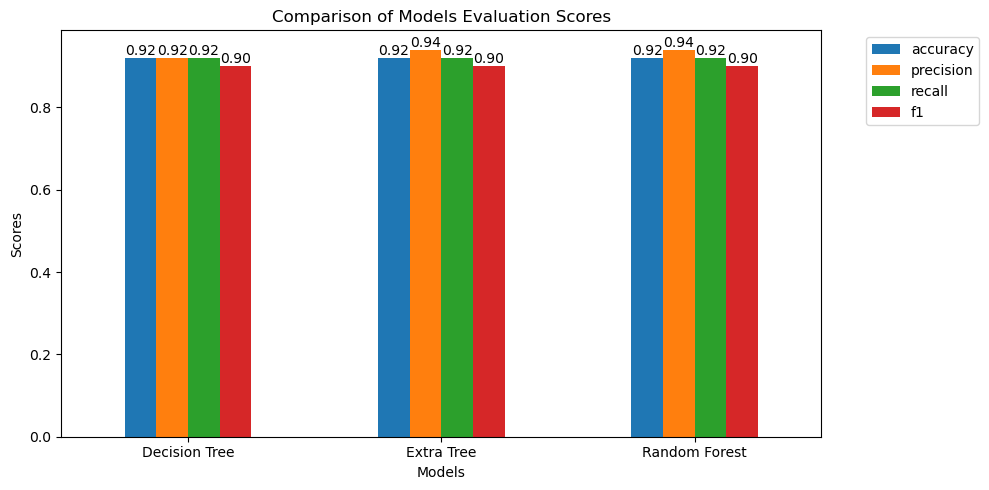

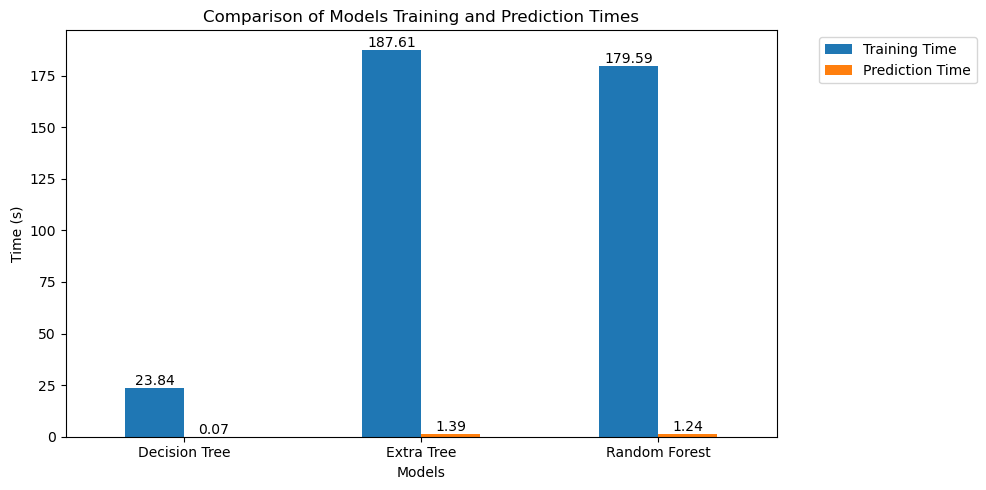

In [28]:
evaluations_df = pd.DataFrame({
    model_name: model_data['evaluation'] for model_name, model_data in model_scores.items()
})

# Plot evaluation scores
ax_eval = evaluations_df.T.plot.bar(rot=0, figsize=(10, 5))
ax_eval.set_xlabel("Models")
ax_eval.set_ylabel("Scores")
ax_eval.set_title("Comparison of Models Evaluation Scores")
ax_eval.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Annotate the height of the bar with values
for p in ax_eval.patches:
    ax_eval.annotate(format(p.get_height(), ".2f"),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center", xytext=(0, 5),
                     textcoords="offset points")

plt.tight_layout()

# Create a DataFrame for training and prediction times
times_df = pd.DataFrame({model_name: {
    'Training Time': model_data['training_time'], 
    'Prediction Time': model_data['prediction_time']
} for model_name, model_data in model_scores.items()})

# Plot training and prediction times
ax_times = times_df.T.plot.bar(rot=0, figsize=(10, 5))
ax_times.set_xlabel("Models")
ax_times.set_ylabel("Time (s)")
ax_times.set_title("Comparison of Models Training and Prediction Times")
ax_times.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Annotate the height of the bar with values
for p in ax_times.patches:
    ax_times.annotate(format(p.get_height(), ".2f"),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha="center", va="center", xytext=(0, 5),
                      textcoords="offset points")

plt.tight_layout()

#### Decision Tree has the best results in terms of scores and time

## Fitting and evaluating the Decision Tree Classifier 

In [38]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_preds = clf.predict(X_test_scaled)

### Evaluating the model with `cross_val_score`

In [39]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

accuracy = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
print(f"Accuracy: {accuracy.mean()*100:.2f}% (+/- {accuracy.std()*2*100:.2f}%)")

precision = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='precision_weighted')
print(f"Precision: {precision.mean():.2f} (+/- {precision.std()*2:.2f})")

recall = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='recall_weighted')
print(f"Recall: {recall.mean():.2f} (+/- {recall.std()*2:.2f})")

f_measure = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='f1_weighted')
print(f"F1: {f_measure.mean():.2f} (+/- {f_measure.std()*2:.2f})")

Accuracy: 98.80% (+/- 2.98%)
Precision: 1.00 (+/- 0.01)
Recall: 0.99 (+/- 0.03)
F1: 0.99 (+/- 0.02)


## Evaluating the model with `roc_curve`

In [40]:
from sklearn.metrics import roc_curve

y_proba = clf.predict_proba(X_test_scaled)

In [41]:
def get_all_roc_coordinates(true_labels, predicted_probabilities):
    """
    Calculate True Positive Rate (TPR) and False Positive Rate (FPR) coordinates for ROC curve.

    Parameters:
        true_labels (array-like): True class labels.
        predicted_probabilities (array-like): Predicted probabilities for the positive class.

    Returns:
        tuple: TPR and FPR coordinates.
    """
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
    return tpr, fpr

def plot_roc_curve(fpr, tpr, ax=None):
    """
    Plot the Receiver Operating Characteristic (ROC) curve.

    Parameters:
        fpr (array-like): False Positive Rate values.
        tpr (array-like): True Positive Rate values.
        ax (matplotlib Axes): The Axes on which to plot the ROC curve.

    Returns:
        None
    """
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.plot(fpr, tpr, label='ROC Curve')
    ax.plot([0, 1], [0, 1], 'k--', label='Guessing')
    
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend()


### Plots the Probability Distributions and the ROC Curves One vs Res

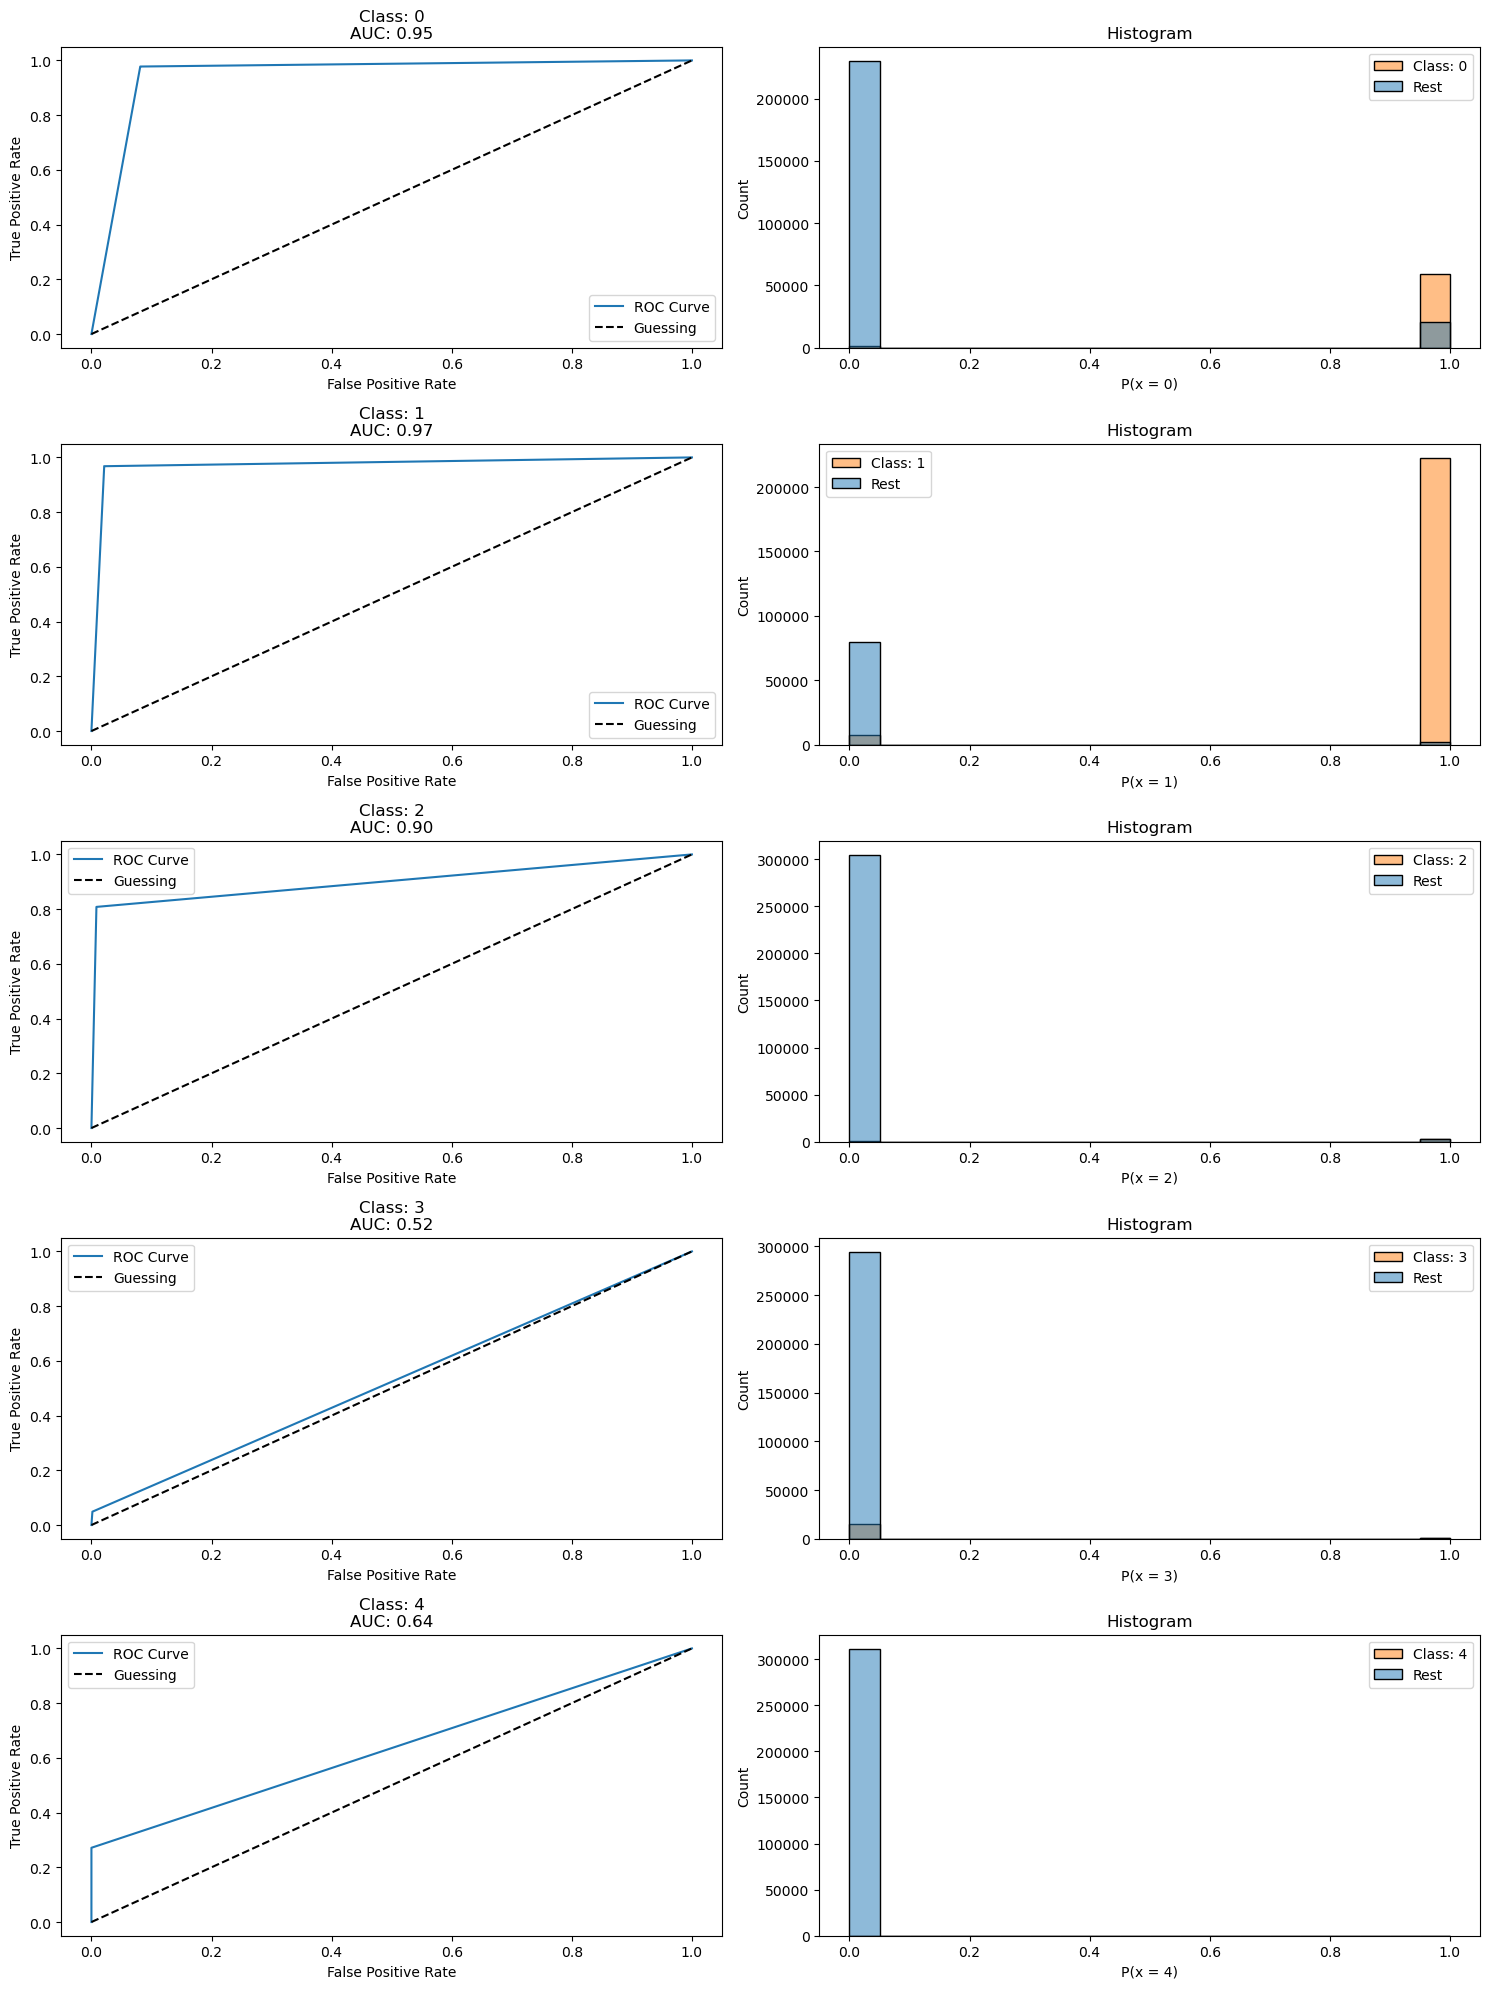

In [42]:
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(15, 20))  

# Define bins for histogram
bins = [i / 20 for i in range(20)] + [1]

# Get the list of classes from the classifier
classes = clf.classes_

# Dictionary to store ROC AUC values for each class
roc_auc_ovr = {}

for i in range(len(classes)):
    c = classes[i]  # Get the current class
    
    # Prepare an auxiliary DataFrame to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]  # Probabilities for the current class
    df_aux = df_aux.reset_index(drop=True)
    
    # Calculate the ROC coordinates and AUC value
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    auc_value = roc_auc_score(df_aux['class'], df_aux['prob'])
    roc_auc_ovr[c] = auc_value
    
    # Create subplots for ROC curve and histogram side by side
    ax_left = plt.subplot(5, 2, i * 2 + 1)  # Creating a subplot for ROC
    plot_roc_curve(fpr, tpr, ax=ax_left)  # Plot ROC curve
    ax_left.set_title(f"Class: {c}\nAUC: {auc_value:.2f}")
    
    ax_right = plt.subplot(5, 2, i * 2 + 2)  # Creating a subplot for histogram
    sns.histplot(x="prob", data=df_aux, hue='class', color='b', ax=ax_right, bins=bins)
    ax_right.set_xlabel(f"P(x = {c})")
    ax_right.set_title("Histogram")
    ax_right.legend([f"Class: {c}", "Rest"])

plt.tight_layout();

## Evaluating the model with Confusion Matrix: `ConfusionMatrixDisplay`

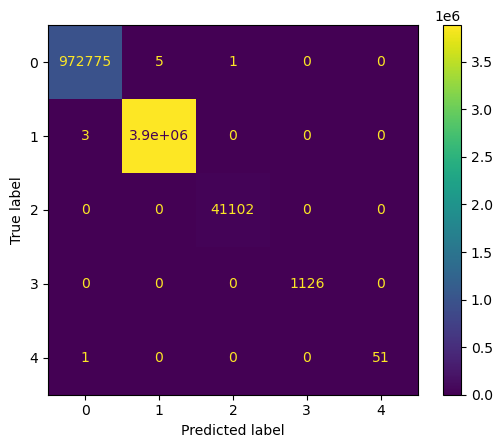

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_train_scaled, y=y_train);

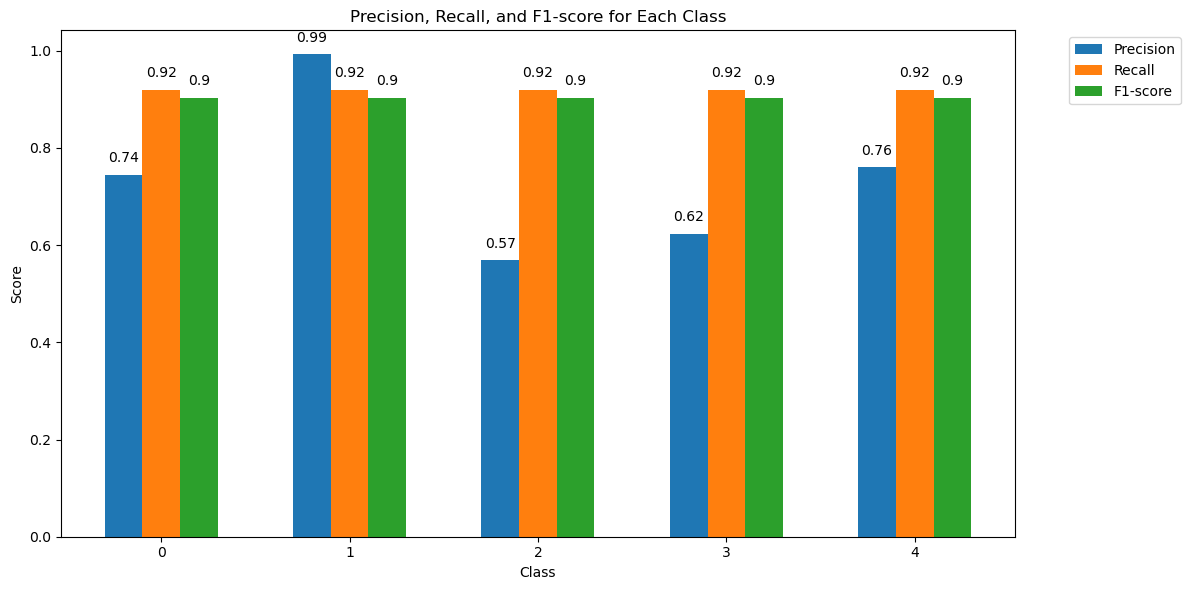

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores = precision_score(y_test, y_preds, labels=classes, average=None)
recall_scores = recall_score(y_test, y_preds, labels=classes, average="weighted")
f1_scores = f1_score(y_test, y_preds, labels=classes, average="weighted")

x = np.array(classes)

plt.figure(figsize=(12, 6))

# Plot precision scores
bars1 = plt.bar(x - 0.2, precision_scores, width=0.2, label='Precision')
# Plot recall scores
bars2 = plt.bar(x, recall_scores, width=0.2, label='Recall')
# Plot F1-scores
bars3 = plt.bar(x + 0.2, f1_scores, width=0.2, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xticks(x, classes)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

add_values(bars1)
add_values(bars2)
add_values(bars3)

plt.tight_layout();

## Classification Report

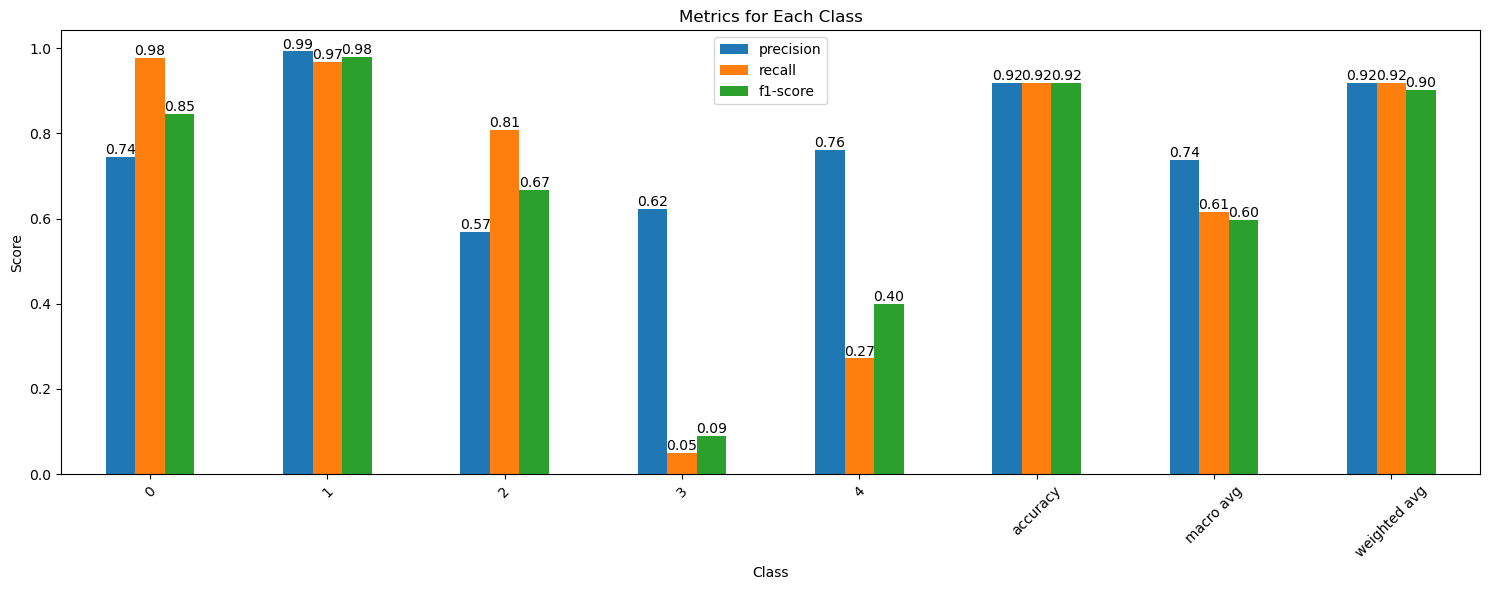

In [78]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_preds, output_dict=True)

# Convert the classification report dictionary into a DataFrame
report_df = pd.DataFrame(report).transpose()

# Set up the figure and axes
plt.figure(figsize=(15, 6))

# Plotting multiple bars for each class
ax = report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=plt.gca())

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Metrics for Each Class')
plt.xticks(rotation=45)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.legend()
plt.tight_layout();

In [45]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"splitter": ['best', "random"],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_depth": [None, 10],
        "class_weight": [None, "balanced"]}

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=3,
                            verbose=1,
                            random_state=42)

rs_clf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=1)

In [46]:
rs_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_preds)

In [47]:
print(rs_metrics)

{'accuracy': 0.92, 'precision': 1.0, 'recall': 0.91, 'f1': 0.95}


In [48]:
best_params = rs_clf.best_params_
print(best_params)

{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': 'balanced'}


## Evaluating the model with `GridSearchCV`

In [54]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

gs_grid = {
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [2, 4, 6],
    "max_depth": [None, 5, 10],
    "class_weight": ["balanced"]
}

gs_clf = GridSearchCV(estimator=clf, param_grid=gs_grid, cv=3, verbose=1)
gs_clf.fit(X_train, y_train)

In [52]:
gs_preds = gs_clf.predict(X_test)

In [53]:
gs_metrics = evaluate_preds(y_test, gs_preds)
print(gs_metrics)

{'accuracy': 0.92, 'precision': 1.0, 'recall': 0.91, 'f1': 0.95}
